In [1]:
#2020-ml-p3-re
!pip uninstall --y kaggle 
!pip install --upgrade pip
!pip install kaggle==1.5.6

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle -v


Uninstalling kaggle-1.5.9:
  Successfully uninstalled kaggle-1.5.9
     |████████████████████████████████| 1.5MB 4.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=e5f02da36616b9aea6e001c162d6e25ebdd1a73cd04ceb84e5610493ac85af97
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [2]:
!kaggle competitions download -c 2020ml3re
!unzip 2020ml3re.zip

  0% 0.00/68.5k [00:00<?, ?B/s]
100% 68.5k/68.5k [00:00<00:00, 44.1MB/s]
Archive:  2020ml3re.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import seaborn as sns
import pandas as pd 
import numpy as np 

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
pd.options.display.max_columns = None
print(df_train.head(20))
print(df_test.head(20)) 

    index  0  1   2   3   4   5   6  7  8   9  10  11  12  13  14  15  16  17  \
0       0  0  0   5  13   9   1   0  0  0   0  13  15  10  15   5   0   0   3   
1       1  0  0   0  12  13   5   0  0  0   0   0  11  16   9   0   0   0   0   
2       2  0  0   0   4  15  12   0  0  0   0   3  16  15  14   0   0   0   0   
3       3  0  0   7  15  13   1   0  0  0   8  13   6  15   4   0   0   0   2   
4       4  0  0   0   1  11   0   0  0  0   0   0   7   8   0   0   0   0   0   
5       5  0  0  12  10   0   0   0  0  0   0  14  16  16  14   0   0   0   0   
6       6  0  0   0  12  13   0   0  0  0   0   5  16   8   0   0   0   0   0   
7       7  0  0   7   8  13  16  15  1  0   0   7   7   4  11  12   0   0   0   
8       8  0  0   9  14   8   1   0  0  0   0  12  14  14  12   0   0   0   0   
9       9  0  0  11  12   0   0   0  0  0   2  16  16  16  13   0   0   0   3   
10     10  0  0   1   9  15  11   0  0  0   0  11  16   8  14   6   0   0   2   
11     11  0  0   0   0  14 

In [4]:
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,[-1]]
test_x = df_test.iloc[:,1:]

print(X.shape)
print(y.shape)
print(test_x.shape)


(1437, 64)
(1437, 1)
(360, 64)


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=777, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1005, 64)
(432, 64)
(1005, 1)
(432, 1)


In [22]:
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',p=10)
    
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/pytho

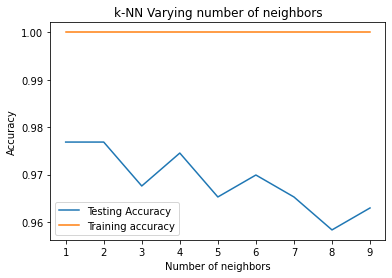

In [23]:
#Generate plot
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,weights='distance',p=10)
knn.fit(X,y)
y_pred = knn.predict(test_x)
y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


array([3, 9, 0, 5, 7, 0, 2, 3, 6, 6, 9, 1, 5, 9, 8, 0, 1, 5, 4, 2, 8, 4,
       5, 1, 5, 8, 8, 7, 2, 0, 6, 6, 9, 1, 6, 9, 9, 5, 4, 7, 2, 4, 4, 9,
       9, 3, 5, 4, 5, 9, 5, 4, 1, 7, 1, 0, 2, 3, 6, 4, 2, 8, 3, 7, 6, 7,
       6, 8, 3, 5, 4, 4, 2, 7, 9, 0, 8, 8, 2, 2, 5, 7, 9, 0, 0, 4, 7, 5,
       7, 8, 4, 0, 1, 9, 1, 7, 6, 8, 4, 4, 5, 4, 9, 2, 0, 1, 4, 6, 8, 9,
       2, 7, 8, 8, 9, 4, 2, 2, 9, 6, 4, 9, 0, 9, 5, 2, 3, 7, 1, 7, 6, 4,
       0, 5, 3, 2, 4, 8, 4, 5, 4, 3, 8, 9, 5, 5, 0, 0, 7, 6, 2, 4, 6, 7,
       2, 4, 9, 2, 1, 6, 2, 3, 5, 3, 1, 0, 1, 3, 6, 4, 9, 9, 7, 1, 3, 3,
       4, 7, 4, 8, 4, 0, 5, 6, 5, 5, 5, 1, 3, 3, 3, 4, 6, 2, 6, 9, 3, 1,
       3, 9, 5, 5, 9, 0, 7, 8, 1, 4, 5, 8, 7, 0, 8, 1, 3, 4, 5, 8, 0, 3,
       4, 7, 4, 9, 2, 7, 4, 8, 0, 9, 5, 8, 4, 7, 1, 2, 6, 6, 5, 3, 1, 6,
       1, 6, 0, 7, 4, 7, 2, 5, 0, 9, 0, 5, 8, 0, 2, 5, 8, 0, 0, 9, 5, 1,
       3, 3, 6, 5, 0, 9, 6, 0, 7, 7, 3, 1, 4, 6, 9, 7, 5, 6, 6, 8, 6, 5,
       6, 9, 4, 3, 5, 1, 2, 6, 4, 9, 2, 0, 4, 3, 6,

In [25]:
submit = pd.read_csv('sample_submission.csv')

submit

,index,label
0,23,1
1,29,1
2,30,1
3,32,1
4,44,1
...,...,...
355,1774,1
356,1784,1
357,1785,1
358,1786,1


In [26]:
for i in range(len(y_pred)):
    submit['label'][i] = y_pred[i].item()

submit

,index,label
0,23,3
1,29,9
2,30,0
3,32,5
4,44,7
...,...,...
355,1774,1
356,1784,5
357,1785,7
358,1786,9


In [27]:
submit.to_csv('result.csv',mode='w',index=False)
!kaggle competitions submit -c 2020ml3re -f result.csv -m "14010974_이기택"

100% 2.26k/2.26k [00:03<00:00, 769B/s]
Successfully submitted to 2020.ML.중간고사.문제3.다시풀기